In [2]:
import pandas
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate
%load_ext autoreload
%autoreload 2

layout = {
    'showlegend': False,
    'margin': {'b':10, 'l':20, 'r':50, 't':50},
    'font': {'size': 19},
    'xaxis': {'zerolinewidth': 2,  'zerolinecolor': 'white'},
    'yaxis': {'zerolinewidth': 2, 'zerolinecolor': 'white'},
    'template': 'plotly_dark',
}

layout = {
    'showlegend': False,
    'margin': {'b':10, 'l':20, 'r':50, 't':50},
    'font': {'size': 19, 'color': 'black'},
    'xaxis': {'zerolinewidth': 2,  'zerolinecolor': 'black', 'gridcolor': '#E1E5ED',
              'tickfont': {'color': 'black'}, 'title': {'font': {'color': 'black', 'size': 22}}},
    'yaxis': {'zerolinewidth': 2, 'zerolinecolor': 'black', 'gridcolor': '#E1E5ED',
              'tickfont': {'color': 'black'}, 'title': {'font': {'color': 'black', 'size': 22}}},
    'template': 'plotly_white',
}

px.defaults.color_discrete_sequence = px.colors.qualitative.T10

# Load results

In [3]:
filenames = ['ma.csv', 'snaive.csv', 'holtwinters.csv', 'perfect.csv', 'lasso.csv', 'prophet.csv', 'kneighbors.csv']
metrics = pandas.DataFrame()
for filename in filenames:
    tmp = pandas.read_csv(filename, index_col=0)
    if filename == 'lasso.csv':
        tmp.algo = ['lasso'] * len(tmp)
    if filename == 'kneighbors.csv':
        tmp.algo = ['kneighbors'] * len(tmp)
    metrics = pandas.concat([metrics, tmp], ignore_index=True)

for filename in filenames:
    algo = filename.split('.')[0]
    print(f'# ## {algo} ##')
    print(f'# ####################')
    print(f'Batch coverage is {metrics[metrics.algo == algo].batch.unique()}')
    print(f'Community size coverage is {metrics[metrics.algo == algo]["index"].unique()}')
    print(f'Number of points {metrics[metrics.algo == algo].batch.count()}')
    print('')

# ## ma ##
# ####################
Batch coverage is [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Community size coverage is [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 35. 40. 45.
 50. 55. 60. 65. 70. 75. 80. 85. 90. 95.]
Number of points 280

# ## snaive ##
# ####################
Batch coverage is [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Community size coverage is [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 35. 40. 45.
 50. 55. 60. 65. 70. 75. 80. 85. 90. 95.]
Number of points 280

# ## holtwinters ##
# ####################
Batch coverage is [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Community size coverage is [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 35. 40. 45.
 50. 55. 60. 65. 70. 75. 80. 85. 90. 95.]
Number of points 280

# ## perfect ##
# ####################
Batch coverage is [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Community size coverage is [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 35. 40. 45.
 50. 55. 60. 65. 70. 75. 80. 85. 90. 95.]
Number of po

In [4]:
metrics.columns

Index(['MAE_kW', 'MAPE_%', 'MAPE_9a8p_%', 'MASE', 'ME_kW', 'algo', 'batch',
       'battery_kW', 'battery_kWh', 'end', 'f_kwarg', 'filename', 'index',
       'pv_capacity', 'scons_%', 'scons_%_nobatt', 'ssuff_%', 'ssuff_%_nobatt',
       'start'],
      dtype='object')

# Visualization

In [5]:
labels  = {'holtwinters': 'Holt-Winters', 'ma': 'Moving average',
           'kneighbors': 'K-Nearest Neighbors', 'lasso': 'LASSO',
           'snaive': 'SNaive', 'prophet': 'Prophet', 'perfect': 'Perfect forecast'}
symbols = {'holtwinters': 'diamond-open', 'ma': 'star', 'kneighbors': 'cross-thin-open',
           'lasso': 'x-thin-open', 'snaive': 'square-open', 'prophet': 'circle-open',
           'perfect': 'y-down'}
op = 0.8
colors  = {'holtwinters': f'rgba(255, 153, 51, {op})', 'ma': f'rgba(55, 128, 191, {op})',
           'kneighbors': f'rgba(50, 171, 96, {op})', 'lasso': f'rgba(128, 0, 128, {op})',
           'snaive': f'rgba(0, 128, 128, {op})', 'prophet': f'rgba(219, 169, 17, {op})',
           'perfect': f'rgba(219, 64, 82, 1.0)'}

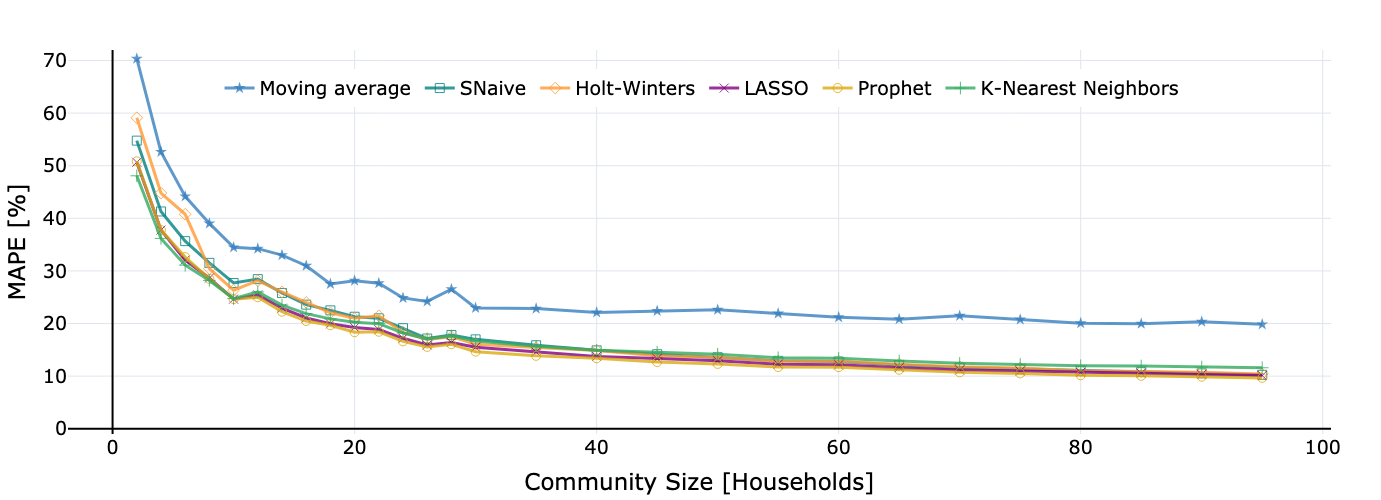

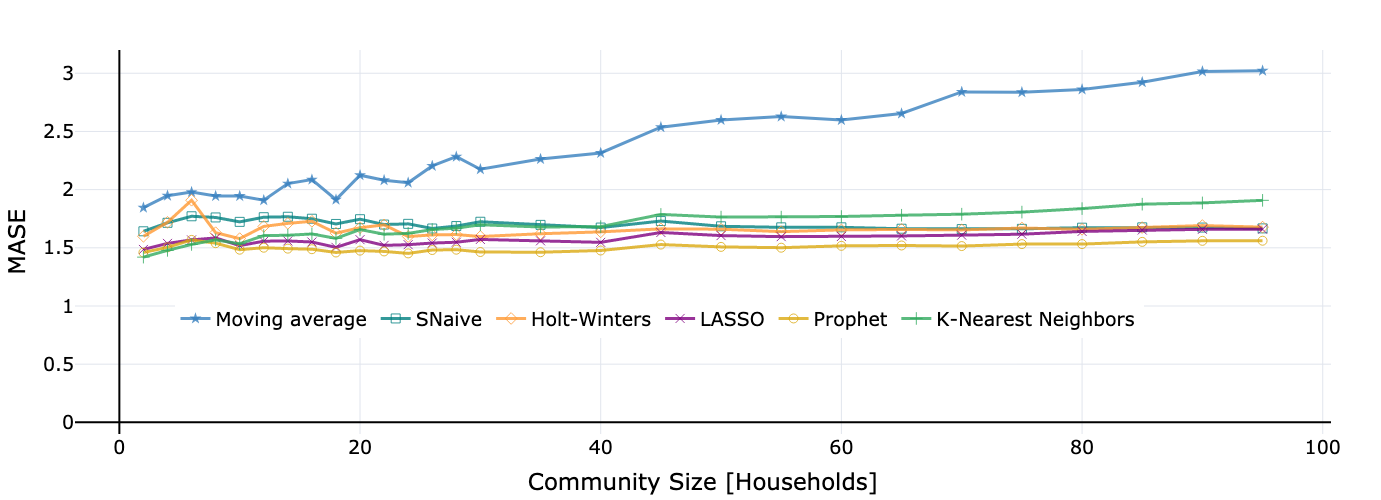

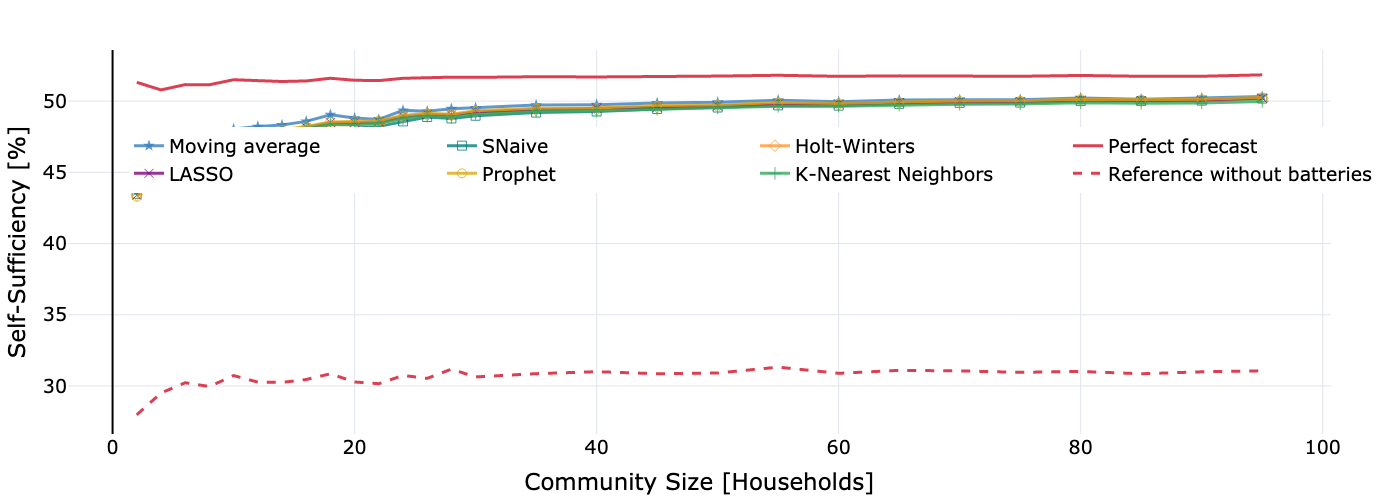

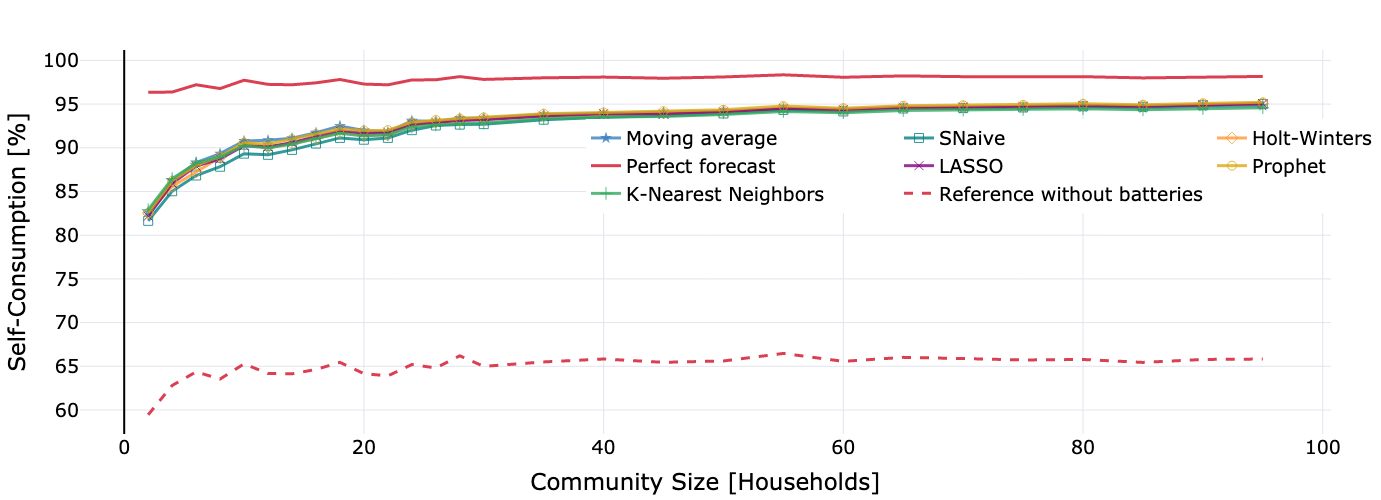

In [28]:
def plot(df, yname, ylabel, labels, symbols, colors, remove_perfect, nobatt=False):
    legends = {'MAPE_%': (0.12, 0.95), 'MASE': (0.08, 0.35),
               'ssuff_%': (0.43, 0.8), 'scons_%': (0.43, 0.82)}
    algos   = list(df.algo.unique())
    if 'perfect' in algos and remove_perfect:
        algos.remove('perfect')

    fig = go.Figure()
    for algo in algos:
        trace = px.line(df[df.algo == algo].groupby('index').mean(),
                        y=yname).data[0]
        trace.update({'name': labels[algo],
                      'mode': 'lines+markers',
                      'showlegend': True,
                      'line': {'color': colors[algo], 'width': 3},
                      'marker': {'symbol': symbols[algo], 'size': 9,
                                 'color': colors[algo]}})
        fig.add_trace(trace)
    
    if nobatt:
        trace = px.line(df[df.algo == 'ma'].groupby('index').mean(),
                        y=yname+'_nobatt').data[0]
        trace.update({'name': 'Reference without batteries',
                      'mode': 'lines',
                      'showlegend': True,
                      'line': {'color': 'rgba(219, 64, 82, 1.0)', 'width': 3, 'dash': 'dash'},
                      'marker': {'symbol': 'circle', 'size': 7,
                                 'color': 'rgba(219, 64, 82, 1.0)'}})
        fig.add_trace(trace)
    
    yrange = None
    if yname in 'MAPE_%':
        yrange = [-1, 72]

    if yname in 'MASE':
        yrange = [-0.1, 3.2]
    
    fig.update_layout(
        layout,
        height=500,
        width=700,
        showlegend=True,
        legend={'x': legends[yname][0], 'y': legends[yname][1], 'orientation': 'h'},
        yaxis={'title': ylabel, 'range': yrange})
    fig.update_xaxes({'title': 'Community Size [Households]'})
    fig.show()
    return fig

fig = plot(metrics, 'MAPE_%', 'MAPE [%]', labels, symbols, colors, remove_perfect=True)
fig.write_image("mape.pdf")
fig = plot(metrics, 'MASE', 'MASE', labels, symbols, colors, remove_perfect=True)
fig.write_image("mase.pdf")
fig = plot(metrics, 'ssuff_%', 'Self-Sufficiency [%]', labels, symbols, colors, remove_perfect=False, nobatt=True)
fig.write_image("ssuff.pdf")
_ = plot(metrics, 'scons_%', 'Self-Consumption [%]', labels, symbols, colors, remove_perfect=False, nobatt=True)

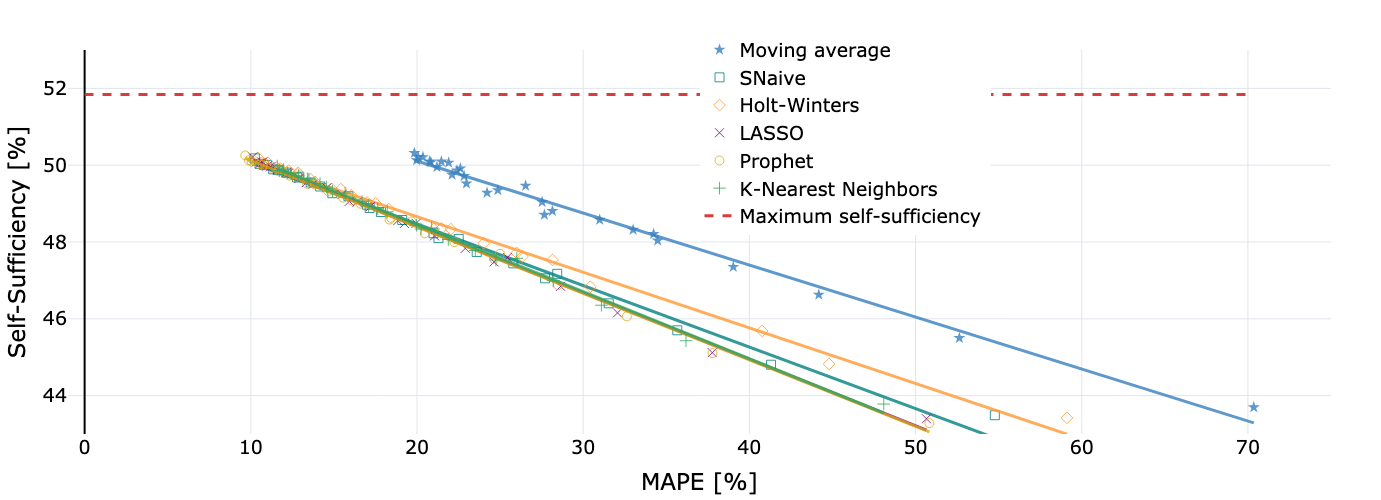

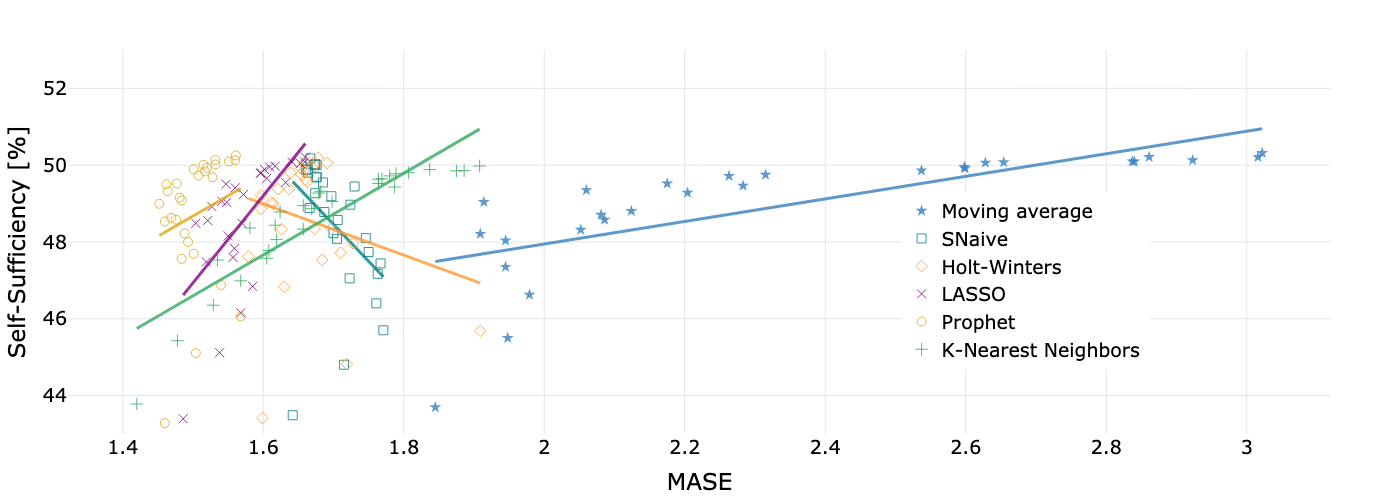

In [7]:
def plot_relation(df, xname, xlabel, yname, ylabel, labels, symbols, colors,):
    algos   = list(df.algo.unique())
    xaxis = {'MAPE_%': {'range': [-1, 75]}, 'MASE': {}}
    legends = {'MAPE_%': {'x': 0.5, 'y': 1.05}, 'MASE': {'x': 0.66, 'y': 0.4}}
    if 'perfect' in algos:
        algos.remove('perfect')

    fig = go.Figure()
    for algo in algos:
        trace = px.scatter(df[df.algo == algo].groupby('index').mean(),
                           x=xname, y=yname, trendline='ols').data
        trace[0].update({'name': labels[algo],
                      'mode': 'markers',
                      'showlegend': True,
                      'marker': {'symbol': symbols[algo], 'size': 9,
                                 'color': colors[algo]}})
        fig.add_trace(trace[0])
        trace[1].update({'name': labels[algo],
                      'mode': 'lines',
                      'showlegend': False,
                      'line': {'color': colors[algo], 'width': 3}})
        fig.add_trace(trace[1])
    
    if xname == 'MAPE_%':
        trace = px.line(x=[0, 70], y=[51.84, 51.84]).data[0]        
        trace.update({'name': 'Maximum self-sufficiency',
                      'mode': 'lines',
                      'showlegend': True,
                      'line': {'color': 'rgba(214, 39, 40, 0.9)', 'width': 3, 'dash': 'dash'},
                      })
        fig.add_trace(trace)        

    fig.update_layout(
        layout,
        height=500,
        width=700,
        showlegend=True,
        xaxis=xaxis[xname],
        yaxis={'title': ylabel, 'range': [43, 53]},
        legend=legends[xname])
    fig.update_xaxes({'title': xlabel})
    fig.show()
    return fig
    
fig = plot_relation(metrics, 'MAPE_%', 'MAPE [%]', 'ssuff_%', 'Self-Sufficiency [%]', labels, symbols, colors)
fig.write_image("relation.pdf")
_ = plot_relation(metrics, 'MASE', 'MASE', 'ssuff_%', 'Self-Sufficiency [%]', labels, symbols, colors)

In [8]:
# EACH ALGO
algos   = list(metrics.algo.unique())
if 'perfect' in algos:
    algos.remove('perfect')
for algo in algos:
    mask = (metrics['algo'] == algo)
    print(algo.upper())
    bar_corr = pandas.DataFrame(index=['corr'], data={
        'MASE' : metrics[mask][['MASE', 'ssuff_%']].corr().iloc[0]['ssuff_%'],
        'MAPE' : metrics[mask][['MAPE_%', 'ssuff_%']].corr().iloc[0]['ssuff_%'],
        'MAPE (9am — 6pm)' : metrics[mask][['MAPE_9a8p_%', 'ssuff_%']].corr().iloc[0]['ssuff_%'],
    })
    display(bar_corr)
    print('-------------')

# ALL
print('ALL')
mask = (metrics['algo'] != 'perfect')
bar_corr = pandas.DataFrame(index=['corr'], data={
    'MASE' : metrics[mask][['MASE', 'ssuff_%']].corr().iloc[0]['ssuff_%'],
    'MAPE' : metrics[mask][['MAPE_%', 'ssuff_%']].corr().iloc[0]['ssuff_%'],
    'MAPE (9am — 6pm)' : metrics[mask][['MAPE_9a8p_%', 'ssuff_%']].corr().iloc[0]['ssuff_%'],
})
display(bar_corr)
print('-------------')

MA


,MASE,MAPE,MAPE (9am — 6pm)
corr,0.511035,-0.921472,-0.970133


-------------
SNAIVE


,MASE,MAPE,MAPE (9am — 6pm)
corr,-0.218841,-0.981011,-0.979301


-------------
HOLTWINTERS


,MASE,MAPE,MAPE (9am — 6pm)
corr,-0.335099,-0.935342,-0.95869


-------------
LASSO


,MASE,MAPE,MAPE (9am — 6pm)
corr,0.295128,-0.981421,-0.982387


-------------
PROPHET


,MASE,MAPE,MAPE (9am — 6pm)
corr,0.04272,-0.983614,-0.98228


-------------
KNEIGHBORS


,MASE,MAPE,MAPE (9am — 6pm)
corr,0.692618,-0.978436,-0.979938


-------------
ALL


,MASE,MAPE,MAPE (9am — 6pm)
corr,0.172848,-0.883678,-0.965966


-------------


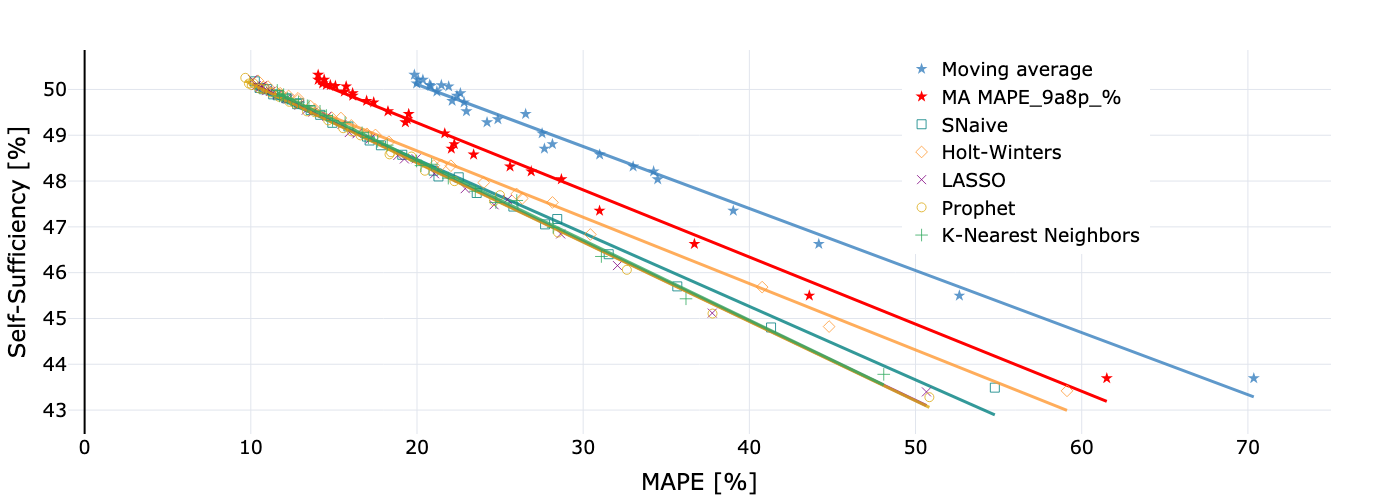

In [9]:
def plot_relation(df, xname, xlabel, yname, ylabel, labels, symbols, colors,):
    algos   = list(df.algo.unique())
    xaxis = {'MAPE_%': {'range': [-1, 75]}, 'MASE': {}}
    legends = {'MAPE_%': {'x': 0.66, 'y': 1}, 'MASE': {'x': 0.66, 'y': 0.5}}
    if 'perfect' in algos:
        algos.remove('perfect')

    fig = go.Figure()
    for algo in algos:
        trace = px.scatter(df[df.algo == algo].groupby('index').mean(),
                           x=xname, y=yname, trendline='ols').data
        trace[0].update({'name': labels[algo],
                      'mode': 'markers',
                      'showlegend': True,
                      'marker': {'symbol': symbols[algo], 'size': 9,
                                 'color': colors[algo]}})
        fig.add_trace(trace[0])
        trace[1].update({'name': labels[algo],
                      'mode': 'lines',
                      'showlegend': False,
                      'line': {'color': colors[algo], 'width': 3}})
        fig.add_trace(trace[1])
        if algo == 'ma':
            trace = px.scatter(df[df.algo == algo].groupby('index').mean(),
                               x='MAPE_9a8p_%', y=yname, trendline='ols').data
            trace[0].update({'name': 'MA MAPE_9a8p_%',
                          'mode': 'markers',
                          'showlegend': True,
                          'marker': {'symbol': symbols[algo], 'size': 9,
                                     'color': 'red'}})
            fig.add_trace(trace[0])
            trace[1].update({'name': labels[algo],
                          'mode': 'lines',
                          'showlegend': False,
                          'line': {'color': 'red', 'width': 3}})
            fig.add_trace(trace[1])
    fig.update_layout(
        layout,
        height=500,
        width=700,
        showlegend=True,
        xaxis=xaxis[xname],
        yaxis={'title': ylabel},
        legend=legends[xname])
    fig.update_xaxes({'title': xlabel})
    fig.show()
    return fig
    
fig = plot_relation(metrics, 'MAPE_%', 'MAPE [%]', 'ssuff_%', 'Self-Sufficiency [%]', labels, symbols, colors)